### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [69]:
data = pd.read_csv('data/coupons.csv')

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [72]:
# Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

# Check for data types of the dataset

print("Data types of the dataset:")
print(data.info())

# Check for unique values in categorical columns
print("Checking for unique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}': {data[col].unique()}")

# Check for potential problematic values in categorical columns by value counts
print("Checking for value counts in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"Value counts for '{col}':\n{data[col].value_counts()}\n")

# Check for standard statistic metrics in numerical columns
print("Checking for standard statistic metrics in numerical columns:")
print(data.describe())

Checking for missing values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Data types of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count 

3. Decide what to do about your missing data -- drop, replace, other...

In [74]:

# Let's handle missing data scenarios:
# Drop 'car' column since it has too many missing values (12576 out of 12684).
data = data.drop('car', axis=1)
print("After dropping 'car' column from the dataset:")
print(data.isnull().sum())

# 'income' and 'education' have missing values. Since these are important features,
# we can drop the rows with missing values in these columns.
data = data.dropna(subset=['income', 'education'])
print("After dropping rows with missing 'income' and 'education':")
print(data.isnull().sum())

# As the rest of the columns have fewer missing values, we can drop the remaining rows with any missing values.
data = data.dropna()
print("After dropping all remaining rows with missing values:")
print(data.isnull().sum())

# Let's verify the shape of the data after handling missing values
print("Shape of the data after handling missing values:")
data.shape

After dropping 'car' column from the dataset:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64
After dropping rows with missing 'income' and 'education':
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration    

(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [76]:
# calculate mean of the 'Y' column
prop_accepted = data['Y'].mean()

print(f"The proportion of total observations that accepted the coupon is: {prop_accepted}")

The proportion of total observations that accepted the coupon is: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\2095178928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='viridis')


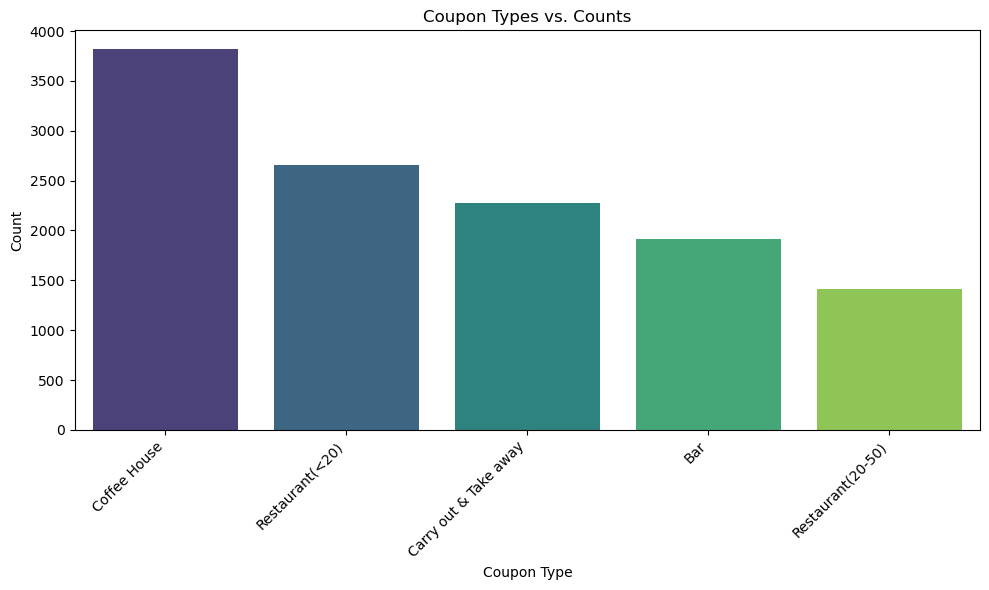

In [78]:
# each coupon type counts
coupon_counts = data['coupon'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='viridis')
plt.title('Coupon Types vs. Counts')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

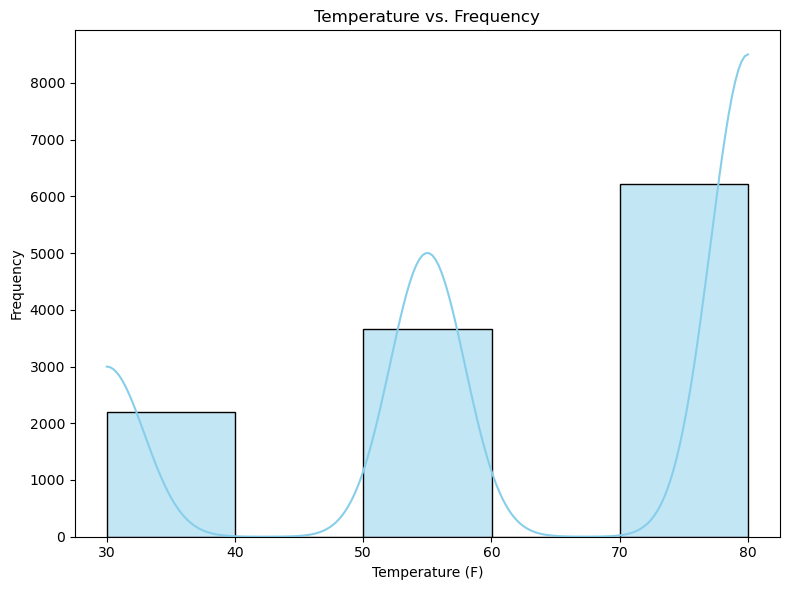

In [80]:
#Histogram for temp. column
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=5, kde=True, color='skyblue')
plt.title('Temperature vs. Frequency')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [82]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [84]:
prop_bar_accepted = bar_coupons['Y'].mean()
print(f"The proportion of bar coupons accepted is: {prop_bar_accepted}")

The proportion of bar coupons accepted is: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [86]:
# bar visit frequency
bar_coupons['bar_freq_group'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')

# acceptance rate for each group
bar_freq_acceptance = bar_coupons.groupby('bar_freq_group')['Y'].mean().reset_index()

print(f"acceptance rate of bar coups who went to bar 3 or fewer times: {bar_freq_acceptance[bar_freq_acceptance['bar_freq_group'] == '3 or fewer times']['Y'].values[0]}")
print(f"acceptance rate of bar coups who went to bar more than 3 times: {bar_freq_acceptance[bar_freq_acceptance['bar_freq_group'] == 'more than 3 times']['Y'].values[0]}")


acceptance rate of bar coups who went to bar 3 or fewer times: 0.37267441860465117
acceptance rate of bar coups who went to bar more than 3 times: 0.7616580310880829


C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\1515323363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['bar_freq_group'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [88]:
# Separate drivers based on bar frequency and age
bar_coupons['bar_age_group'] = 'Others'
bar_coupons.loc[((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))), 'bar_age_group'] = 'More than once a month and > 25'

# acceptance rate for each group
bar_age_acceptance = bar_coupons.groupby('bar_age_group')['Y'].mean().reset_index()

print("Acceptance rates based on bar frequency and age:")
print(bar_age_acceptance)

# acceptance rate for each group
acceptance_rate_group1 = bar_age_acceptance[bar_age_acceptance['bar_age_group'] == 'More than once a month and > 25']['Y'].values[0]
acceptance_rate_group2 = bar_age_acceptance[bar_age_acceptance['bar_age_group'] == 'Others']['Y'].values[0]

difference = acceptance_rate_group1 - acceptance_rate_group2

print(f"\nAcceptance rate for 'More than once a month and > 25': {acceptance_rate_group1:.4f}")
print(f"Acceptance rate for 'Others': {acceptance_rate_group2:.4f}")
print(f"Difference in acceptance rates: {difference:.4f}")

Acceptance rates based on bar frequency and age:
                     bar_age_group         Y
0  More than once a month and > 25  0.689826
1                           Others  0.337748

Acceptance rate for 'More than once a month and > 25': 0.6898
Acceptance rate for 'Others': 0.3377
Difference in acceptance rates: 0.3521


C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3814627191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['bar_age_group'] = 'Others'


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [90]:
# Separate drivers based on the specified criteria
bar_coupons['complex_group'] = 'Others'

criteria_met = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['kid(s)'])) &
    (~bar_coupons['occupation'].isin(['farming, fishing, and forestry']))
)

bar_coupons.loc[criteria_met, 'complex_group'] = 'Meets Criteria'

# Calculate acceptance rate for each group
complex_acceptance = bar_coupons.groupby('complex_group')['Y'].mean().reset_index()

print("Acceptance rates based on complex criteria:")
print(complex_acceptance)

# Extract acceptance rates
acceptance_rate_meets_criteria = complex_acceptance[complex_acceptance['complex_group'] == 'Meets Criteria']['Y'].values[0]
acceptance_rate_others_complex = complex_acceptance[complex_acceptance['complex_group'] == 'Others']['Y'].values[0]

difference_complex = acceptance_rate_meets_criteria - acceptance_rate_others_complex

print(f"\nAcceptance rate for 'Meets Criteria': {acceptance_rate_meets_criteria:.4f}")
print(f"Acceptance rate for 'Others': {acceptance_rate_others_complex:.4f}")
print(f"Difference in acceptance rates: {difference_complex:.4f}")

Acceptance rates based on complex criteria:
    complex_group         Y
0  Meets Criteria  0.685315
1          Others  0.295302

Acceptance rate for 'Meets Criteria': 0.6853
Acceptance rate for 'Others': 0.2953
Difference in acceptance rates: 0.3900


C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\850058418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['complex_group'] = 'Others'


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [92]:
# conditions
condition1 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~data['passanger'].isin(['kid(s)'])) &
    (~data['maritalStatus'].isin(['Widowed']))
)

condition2 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['age'].isin(['below 21', '21', '26']))
)

condition3 = (
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 'Less than $12500']))
)

# all conditions together
combined_condition = condition1 | condition2 | condition3

# Create groups based on the combined condition
data['combined_group'] = 'Others'
data.loc[combined_condition, 'combined_group'] = 'Meets Combined Criteria'

# Calculate acceptance rate for each group
combined_acceptance = data.groupby('combined_group')['Y'].mean().reset_index()

print("Acceptance rates based on combined criteria:")
print(combined_acceptance)

# Extract acceptance rates
acceptance_rate_meets_combined_criteria = combined_acceptance[combined_acceptance['combined_group'] == 'Meets Combined Criteria']['Y'].values[0]
acceptance_rate_others_combined = combined_acceptance[combined_acceptance['combined_group'] == 'Others']['Y'].values[0]

difference_combined = acceptance_rate_meets_combined_criteria - acceptance_rate_others_combined

print(f"\nAcceptance rate for 'Meets Combined Criteria': {acceptance_rate_meets_combined_criteria:.4f}")
print(f"Acceptance rate for 'Others': {acceptance_rate_others_combined:.4f}")
print(f"Difference in acceptance rates: {difference_combined:.4f}")

Acceptance rates based on combined criteria:
            combined_group         Y
0  Meets Combined Criteria  0.605438
1                   Others  0.542845

Acceptance rate for 'Meets Combined Criteria': 0.6054
Acceptance rate for 'Others': 0.5428
Difference in acceptance rates: 0.0626


C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3150113760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bar_freq_group', y='Y', data=bar_freq_acceptance, palette='viridis')


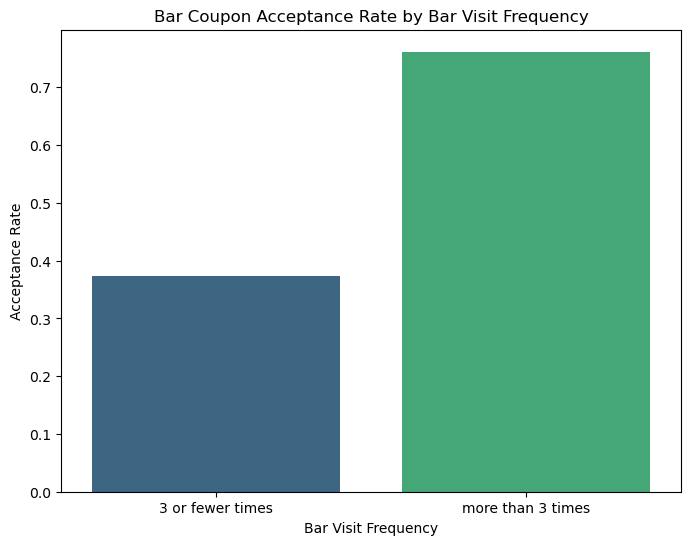

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3150113760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bar_age_group', y='Y', data=bar_age_acceptance, palette='viridis')


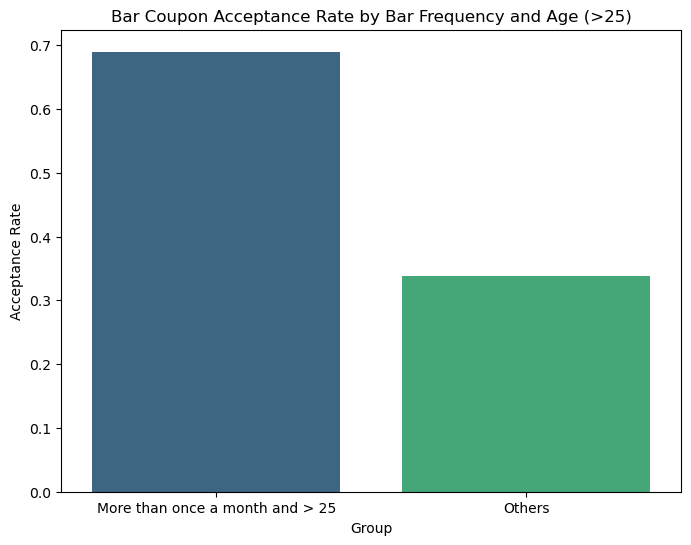

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3150113760.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='complex_group', y='Y', data=complex_acceptance, palette='viridis')


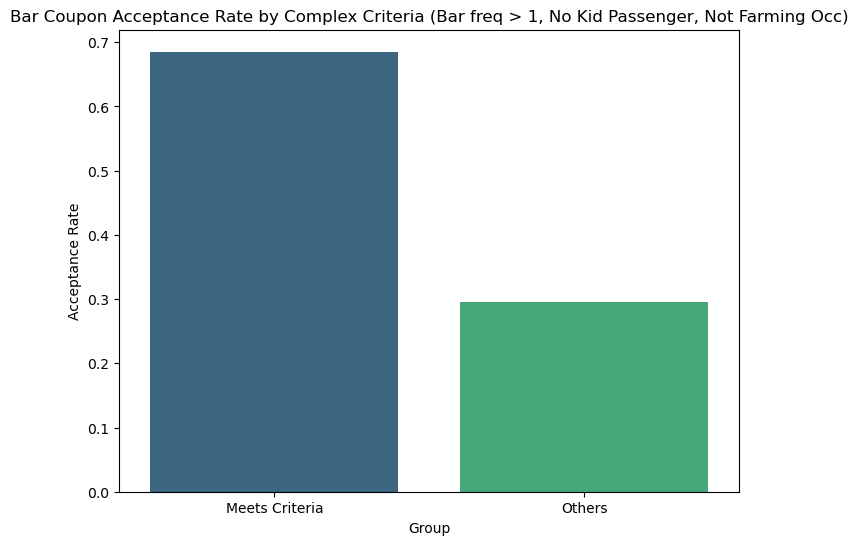

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3150113760.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='combined_group', y='Y', data=combined_acceptance, palette='viridis')


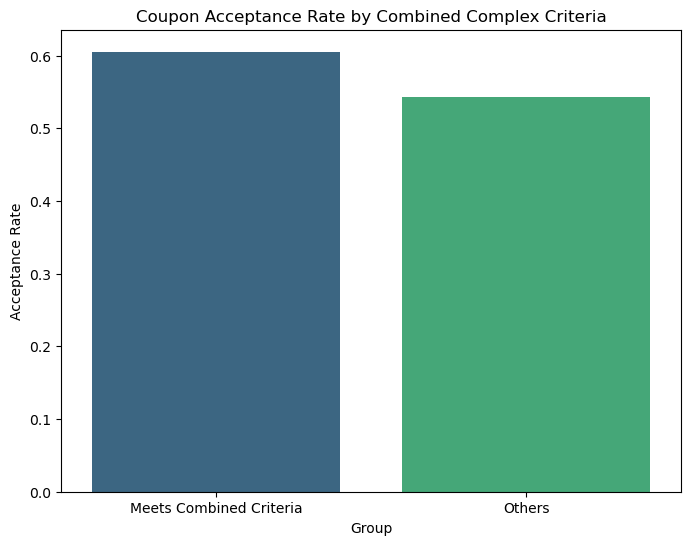

In [93]:
# Visualize acceptance rate based on bar frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='bar_freq_group', y='Y', data=bar_freq_acceptance, palette='viridis')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()

# Visualize acceptance rate based on age and bar frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='bar_age_group', y='Y', data=bar_age_acceptance, palette='viridis')
plt.title('Bar Coupon Acceptance Rate by Bar Frequency and Age (>25)')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()

# Visualize acceptance rate based on complex criteria
plt.figure(figsize=(8, 6))
sns.barplot(x='complex_group', y='Y', data=complex_acceptance, palette='viridis')
plt.title('Bar Coupon Acceptance Rate by Complex Criteria (Bar freq > 1, No Kid Passenger, Not Farming Occ)')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()

# Visualize acceptance rate based on combined criteria
plt.figure(figsize=(8, 6))
sns.barplot(x='combined_group', y='Y', data=combined_acceptance, palette='viridis')
plt.title('Coupon Acceptance Rate by Combined Complex Criteria')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Summary of Findings

- **Frequent Bar-Goers Accept More**: People who visit bars regularly — especially more than once or a few times a month — are much more likely to accept bar coupons. This suggests that prior interest in going to bars strongly influences coupon acceptance.

- **Age Matters When Combined with Habits**: Drivers over 25 who also go to bars more than once a month are more likely to say yes to bar coupons, hinting at an interaction between age and lifestyle habits.

- **Certain Lifestyles Are More Receptive**: When you add other factors like riding with adults (not kids) and having non-rural occupations, the likelihood of accepting the coupon increases. These patterns seem to align with a social, bar-friendly lifestyle.

- **Complex Criteria Tell a Clearer Story**: The highest acceptance rates show up when several traits come together — frequent bar visits, being over 25, no kids in the car, higher cheap restaurant frequency, and certain income or marital statuses.

---

### Hypothesis

People who are already socially inclined to visit bars — especially those over 25, without kids in the car, and with certain jobs or income levels — are far more likely to accept a bar coupon. In short, **those who already live a “bar-going” lifestyle are the most responsive to bar coupons.**


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [98]:
# Coupon group for  'Coffee House'
coffee_coupons = data[data['coupon'] == 'Coffee House']

# proportion of coffee house coupons were accepted?
prop_coffee_accepted = coffee_coupons['Y'].mean()
print(f"The proportion of coffee house coupons accepted is: {prop_coffee_accepted:.4f}")

# acceptance rate based on passenger type
passenger_acceptance_coffee = coffee_coupons.groupby('passanger')['Y'].mean().reset_index()
print("Acceptance rates for Coffee House coupons based on passenger type:")
print(passenger_acceptance_coffee)

# acceptance rate based on 'time'
time_acceptance_coffee = coffee_coupons.groupby('time')['Y'].mean().reset_index()
print("\nAcceptance rates for Coffee House coupons based on time of day:")
print(time_acceptance_coffee)

# acceptance rate based on 'CoffeeHouse' frequency
coffee_coupons['coffee_freq_group'] = coffee_coupons['CoffeeHouse'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')
coffee_freq_acceptance = coffee_coupons.groupby('coffee_freq_group')['Y'].mean().reset_index()
print("Acceptance rates for Coffee House coupons based on Coffee House visit frequency:")
print(coffee_freq_acceptance)

# 'passanger' and 'time' on acceptance
passanger_time_acceptance_coffee = coffee_coupons.groupby(['passanger', 'time'])['Y'].mean().reset_index()
print("\nAcceptance rates for Coffee House coupons based on passenger and time of day:")
print(passanger_time_acceptance_coffee)

# acceptance based on age groups and 'CoffeeHouse' frequency
coffee_coupons['age_group'] = coffee_coupons['age'].apply(lambda x: 'under 30' if x in ['below 21', '21', '26'] else '30+')
age_freq_acceptance_coffee = coffee_coupons.groupby(['age_group', 'coffee_freq_group'])['Y'].mean().reset_index()
print("\nAcceptance rates for Coffee House coupons based on age group and Coffee House visit frequency:")
print(age_freq_acceptance_coffee)



The proportion of coffee house coupons accepted is: 0.4963
Acceptance rates for Coffee House coupons based on passenger type:
   passanger         Y
0      Alone  0.433936
1  Friend(s)  0.597447
2     Kid(s)  0.471503
3    Partner  0.567010

Acceptance rates for Coffee House coupons based on time of day:
   time         Y
0  10AM  0.634772
1  10PM  0.429078
2   2PM  0.545455
3   6PM  0.412272
4   7AM  0.440000
Acceptance rates for Coffee House coupons based on Coffee House visit frequency:
   coffee_freq_group         Y
0   3 or fewer times  0.445905
1  more than 3 times  0.672556

Acceptance rates for Coffee House coupons based on passenger and time of day:
    passanger  time         Y
0       Alone  10AM  0.605114
1       Alone  10PM  0.289617
2       Alone   6PM  0.381526
3       Alone   7AM  0.440000
4   Friend(s)  10AM  0.675325
5   Friend(s)  10PM  0.686869
6   Friend(s)   2PM  0.552459
7   Friend(s)   6PM  0.563291
8      Kid(s)  10AM  0.696970
9      Kid(s)   2PM  0.545455
10 

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3639259289.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_coupons['coffee_freq_group'] = coffee_coupons['CoffeeHouse'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')
C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\3639259289.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_coupons['age_group'] = coffee_coupons['age'].apply(lambda x: 'under 30' if x in ['below 21', '21', '26'] else '30+

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\2648897436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passanger', y='Y', data=passenger_acceptance_coffee, palette='coolwarm')


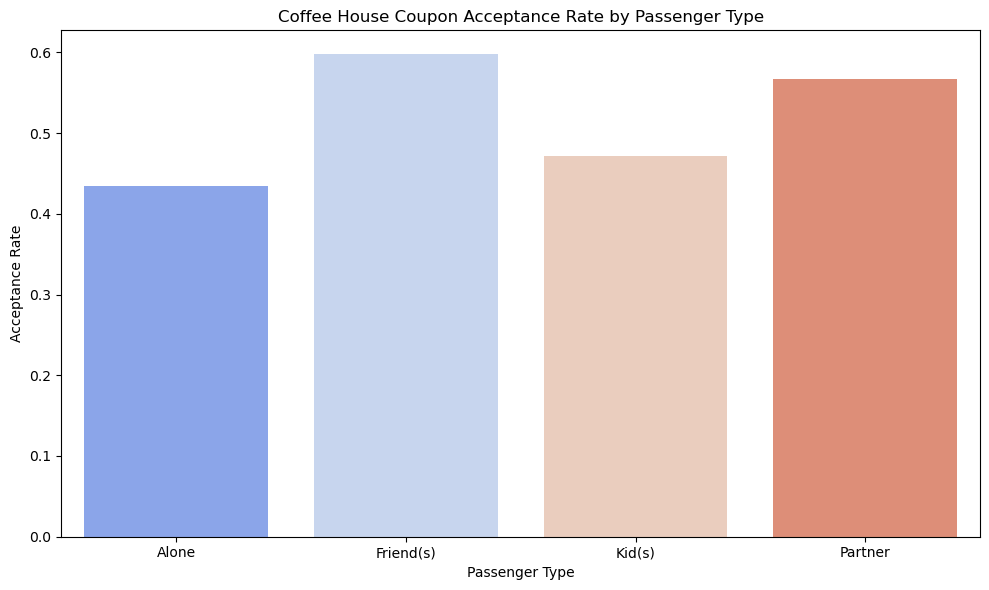

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\2648897436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time', y='Y', data=time_acceptance_coffee, palette='viridis')


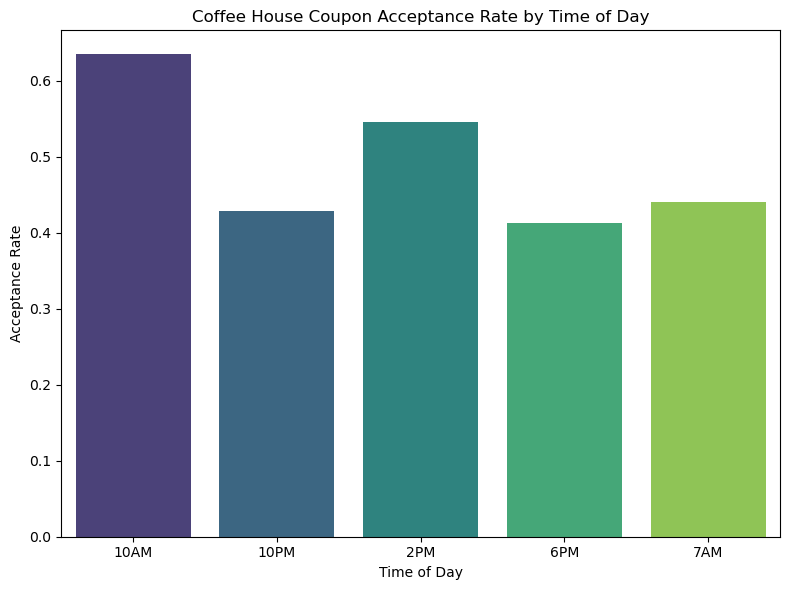

C:\Users\mahes\AppData\Local\Temp\ipykernel_23336\2648897436.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coffee_freq_group', y='Y', data=coffee_freq_acceptance, palette='plasma')


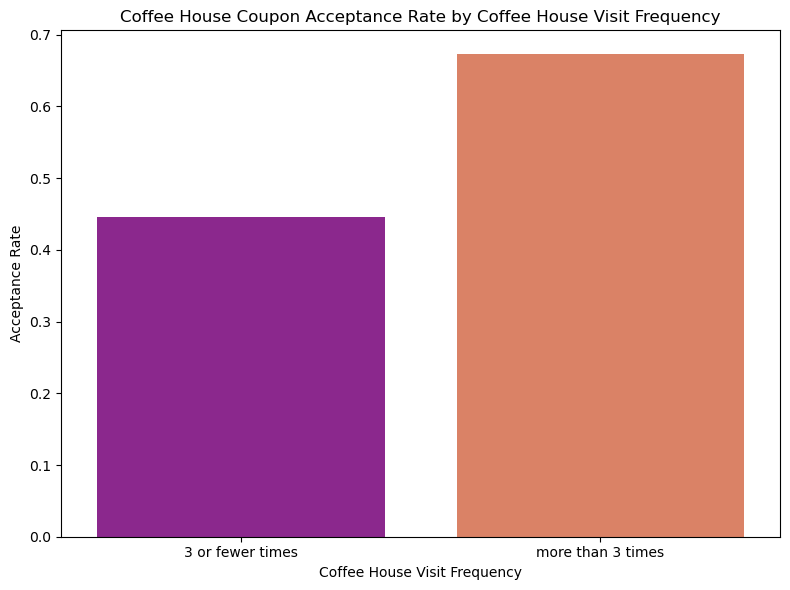

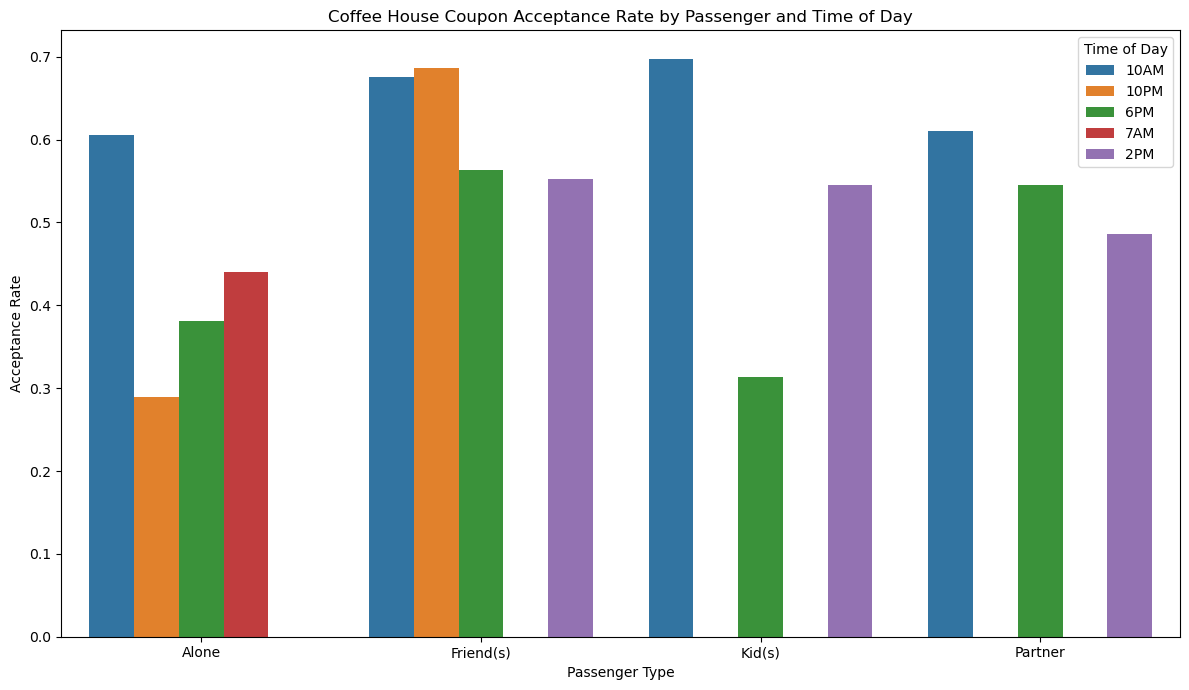

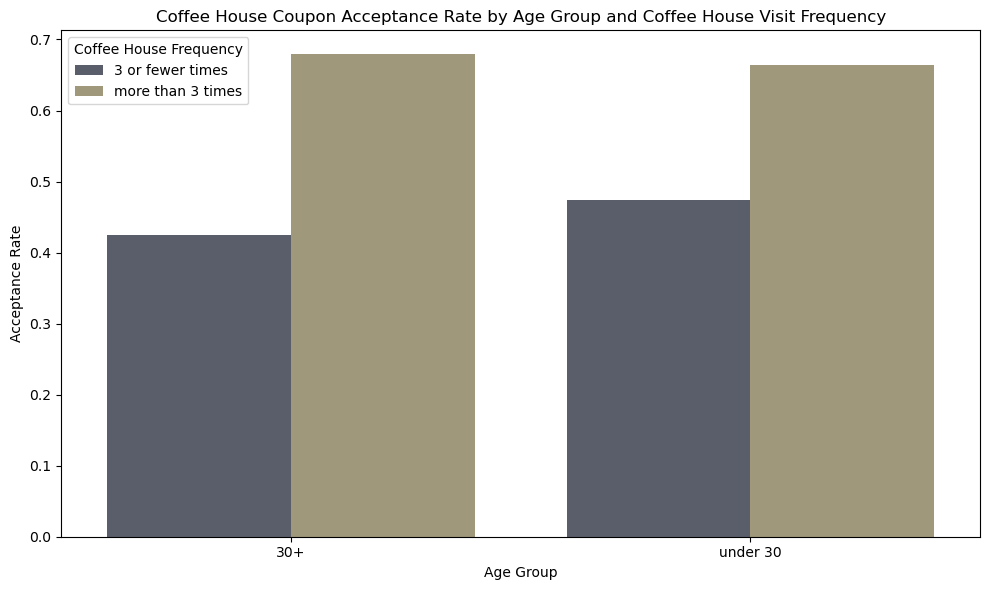

In [99]:
# Visualize acceptance rate based on passenger type
plt.figure(figsize=(10, 6))
sns.barplot(x='passanger', y='Y', data=passenger_acceptance_coffee, palette='coolwarm')
plt.title('Coffee House Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

# Visualize acceptance rate based on time of day
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='Y', data=time_acceptance_coffee, palette='viridis')
plt.title('Coffee House Coupon Acceptance Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

# Visualize acceptance rate based on Coffee House visit frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='coffee_freq_group', y='Y', data=coffee_freq_acceptance, palette='plasma')
plt.title('Coffee House Coupon Acceptance Rate by Coffee House Visit Frequency')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

# Visualize acceptance rate based on passenger and time of day
plt.figure(figsize=(12, 7))
sns.barplot(x='passanger', y='Y', hue='time', data=passanger_time_acceptance_coffee, palette='tab10')
plt.title('Coffee House Coupon Acceptance Rate by Passenger and Time of Day')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

# Visualize acceptance rate based on age group and Coffee House visit frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Y', hue='coffee_freq_group', data=age_freq_acceptance_coffee, palette='cividis')
plt.title('Coffee House Coupon Acceptance Rate by Age Group and Coffee House Visit Frequency')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.legend(title='Coffee House Frequency')
plt.tight_layout()
plt.show()



### Coffee House analysis

Based on our exploration, a few patterns stand out among drivers who accepted coffee house coupons.

- **Driving habbits** People driving with friends or partners tend to accept the coupon more often than those driving alone or with kids.
Time of day also seems to play a role—acceptance rates are noticeably higher at 10 AM and 2 PM.
Not surprisingly, people who already visit coffee houses regularly are more likely to take the offer.

- **Other combination of factors** There are also interesting interactions between these factors.
For example, drivers with friends or partners as passengers show consistently high acceptance rates at all times of day,
while drivers alone are less likely to accept—but are slightly more open to it during the morning (especially around 10 AM).

### Hypothesis:
Drivers who accept coffee house coupons are typically those who already have a habit of going to coffee shops,
are not alone in the car (especially when with a friend or partner), and are more receptive during morning or early afternoon hours.
The combination of having company and a regular coffee habit seems to strongly predict coupon acceptance.




